Process text from entire books
===

* This could be the first step of a possible final project  
* In a further step text could be analyzed   
* Books could be rated according to certain dimensions  
* Find the music with the most similar lyrics to a book  

## From PDF to Text

In [1]:
#
#
#

## From Ebook to Text

In [2]:
#
#
#

## Books that were already converted to txt

In [3]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import contractions


books = glob("data/*.txt")

books

['data/Thomas Pynchon - V.txt',
 "data/Thomas Pynchon - Gravity's rainbow.txt",
 'data/William Faulkner - The Sound and the Fury.txt']

In [4]:
with open('data/William Faulkner - The Sound and the Fury.txt', "r") as fo:
    book = fo.readlines()

print(f"Book has {len(book)} paragraphs.")

Book has 6664 paragraphs.


### Inspection
1. Novel starts at paragraph 58
2. There are meaningless numbers in the format "1.8" in between the text on single lines.
3. Each paragraph ends with `\n` which is not necessary here
4. There are entirely empty lines

#### 1. Trim

In [5]:
book = book[58:]

#### 2. Remove meaningless numbers and 3. remove `\n`

*Example*

In [6]:
book[22]

'4.1\n'

In [7]:
book[0]

'April 7, 1928\n'

In [8]:
rm_pattern_1 = "^[0-9]*\.[0-9]*\\n$"
rm_pattern_2 = "\\n$"

for i, _ in enumerate(book):
    book[i] = re.sub(rm_pattern_1, "", book[i]) 
    book[i] = re.sub(rm_pattern_2, "", book[i]) 

*Example*

In [9]:
book[22]

''

In [10]:
book[0]

'April 7, 1928'

#### 4. Remove empty lines

*Before*

In [11]:
for p in book[:7]:
    print(p)

April 7, 1928



Through the fence, between the curling flower spaces, I could see them hitting. They were coming toward where the flag was and I went along the fence. Luster was hunting in the grass by the flower tree. They took the flag out, and they were hitting. Then they put the flag back and they went to the table, and he hit and the other hit. Then they went on, and I went along the fence. Luster came away from the flower tree and we went along the fence and they stopped and we stopped and I looked through the fence while Luster was hunting in the grass.

"Here, caddie." He hit. They went away across the pasture. I held to the fence and watched them going away.


*After*

In [12]:
book_trimmed = [p for p in book if p != '']

for p in book_trimmed[:3]:
    print(p)

April 7, 1928
Through the fence, between the curling flower spaces, I could see them hitting. They were coming toward where the flag was and I went along the fence. Luster was hunting in the grass by the flower tree. They took the flag out, and they were hitting. Then they put the flag back and they went to the table, and he hit and the other hit. Then they went on, and I went along the fence. Luster came away from the flower tree and we went along the fence and they stopped and we stopped and I looked through the fence while Luster was hunting in the grass.
"Here, caddie." He hit. They went away across the pasture. I held to the fence and watched them going away.


## Start analyzing the text

### Fix contractions & lower case

In [13]:
for i, _ in enumerate(book_trimmed):
    book_trimmed[i] = contractions.fix(book_trimmed[i]).lower()

### Tokenize paragraphs to sentences

In [14]:
import nltk
from copy import deepcopy

book_trimmed_tokenized = deepcopy(book_trimmed)

for i, p in enumerate(book_trimmed):
    book_trimmed_tokenized[i] = nltk.sent_tokenize(p)

### Sentiment scores for sentences

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

<div class="alert alert-warning">Let's see what is the difference between computing the score over the individual sentences or for the whole paragraph. It seems that this is an absolute value that accumulates the longer a text. High scores for long texts can thus be misleading. Is there a relative measure? Dividing by number of words or sentences? That would be necessary to make valid comparisons. I.e. 2 books could have both positive scores, but one has higher scores. Could it be because of its length?</div>

#### One example paragraph

In [16]:
p_i = 6 # paragraph index

print("A) whole paragraph:\n")
print(book_trimmed[p_i])
print("=>", sid.polarity_scores(book_trimmed[p_i])['compound'])

print("\nB) single sentences:\n")
for sent in book_trimmed_tokenized[p_i]:
    print(sent)
    print("=>", sid.polarity_scores(sent)['compound'])

A) whole paragraph:

it was red, flapping on the pasture. then there was a bird slanting and tilting on it. luster threw. the flag flapped on the bright grass and the trees. i held to the fence.
=> 0.4404

B) single sentences:

it was red, flapping on the pasture.
=> 0.0
then there was a bird slanting and tilting on it.
=> 0.0
luster threw.
=> 0.0
the flag flapped on the bright grass and the trees.
=> 0.4404
i held to the fence.
=> 0.0


#### Across all paragraphs

In [17]:
scores = []

for p in book_trimmed:
    scores.append(sid.polarity_scores(p)['compound'])

##### Total score of this book

In [18]:
np.sum(scores)

43.4318

##### Average score of this book

In [19]:
np.mean(scores)

0.013687929404349198

The book seems neutral according to the sentiment scores.

##### Most positive paragraph in the book

In [20]:
print(book_trimmed[np.argmax(scores)])
print("=>", np.max(scores))

candace (caddy). doomed and knew it, accepted the doom without either seeking or fleeing it. loved her brother despite him, loved not only him but loved in him that bitter prophet and inflexible corruptless judge of what he considered the family's honor and its doom, as he thought he loved but really hated in her what he considered the frail doomed vessel of its pride and the foul instrument of its disgrace, not only this, she loved him not only in spite of but because of the fact that he himself was incapable of love, accepting the fact that he must value above all not her but the virginity of which she was custodian and on which she placed no value whatever: the frail physical stricture which to her was no more than a hangnail would have been. knew the brother loved death best of all and was not jealous, would (and perhaps in the calculation and deliberation of her marriage did) have handed him the hypothetical hemlock. was two months pregnant with another man's child which regardles

##### Most negative paragraph in the book

In [21]:
print(book_trimmed[np.argmin(scores)])
print("=>", np.min(scores))

what have i done to have been given children like these benjamin was punishment enough and now for her to have no more regard for me her own mother i have suffered for her dreamed and planned and sacrificed i went down into the valley yet never since she opened her eyes has she given me one unselfish thought at times i look at her i wonder if she can be my child except jason he has never given me one moment's sorrow since i first held him in my arms i knew then that he was to be my joy and my salvation i thought that benjamin was punishment enough for any sins i have committed i thought he was my punishment for putting aside my pride and marrying a man who held himself above me i do not complain i loved him above all of them because of it because my duty though jason pulling at my heart all the while but i see now that i have not suffered enough i see now that i must pay for your sins as well as mine what have you done what sins have your high and mighty people visited upon me but you 

<div class="alert alert-warning">With respect to what I wrote before about the sentiment score I am not surprised that both examples are very long paragraphs.</div>

##### How the score develops throughout the book

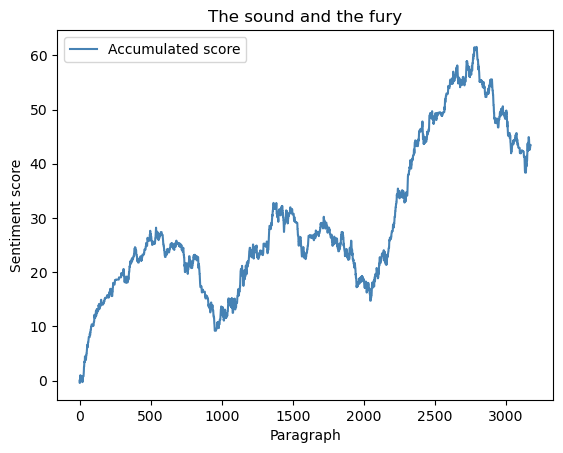

In [22]:
plt.plot(np.cumsum(scores), color="steelblue", label="Accumulated score")
plt.title("The sound and the fury")
plt.ylabel("Sentiment score")
plt.xlabel("Paragraph")
plt.legend();

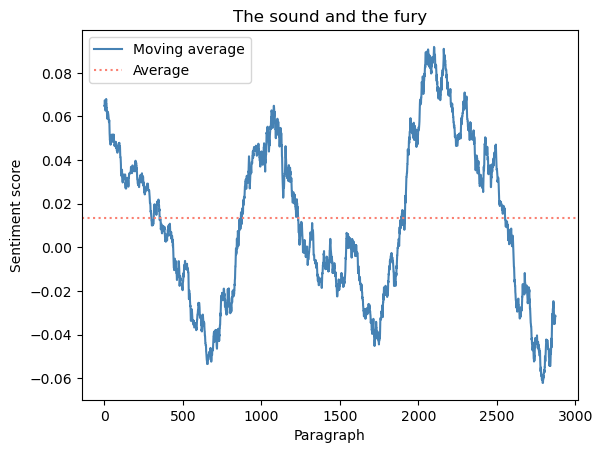

In [23]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


window = 300 # smoothness of convolution

plt.plot(moving_average(scores, window), label="Moving average", color="steelblue")
plt.axhline(np.mean(scores), label="Average", color="salmon", linestyle=":")
plt.title("The sound and the fury")
plt.ylabel("Sentiment score")
plt.xlabel("Paragraph")
plt.legend();

Looks like we arrive emotionally to the first minimum around paragraph 700. There two more, one in the middle of the book and one close to the end.  